<a href="https://colab.research.google.com/github/kasireddyasam/AI-course-/blob/main/Child_Desease_project_Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df= pd.DataFrame(df,columns=df.columns)

In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


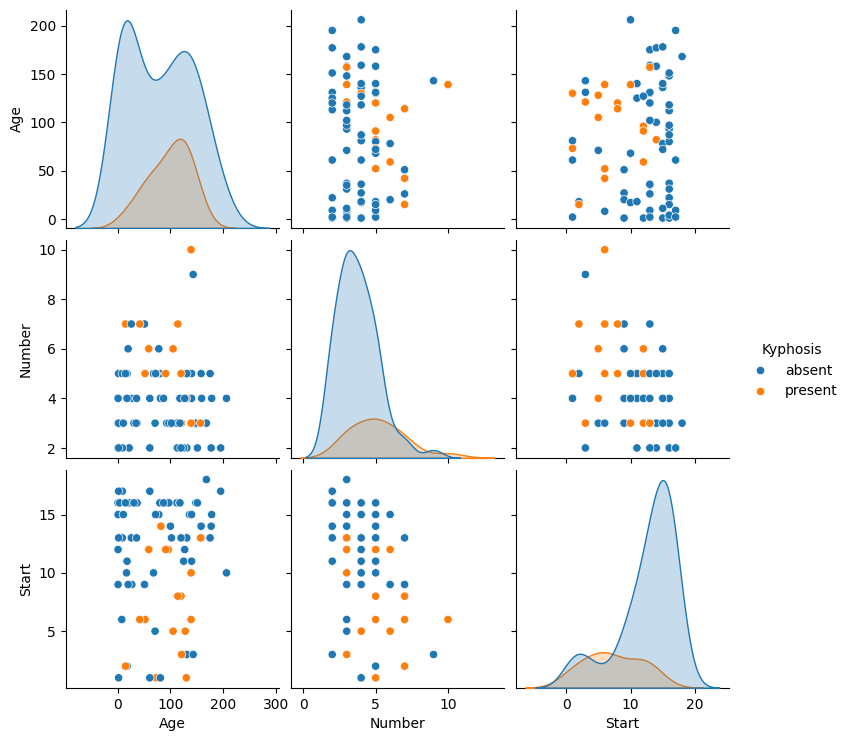

In [8]:
sns.pairplot(df,hue = 'Kyphosis')

<Axes: xlabel='count'>

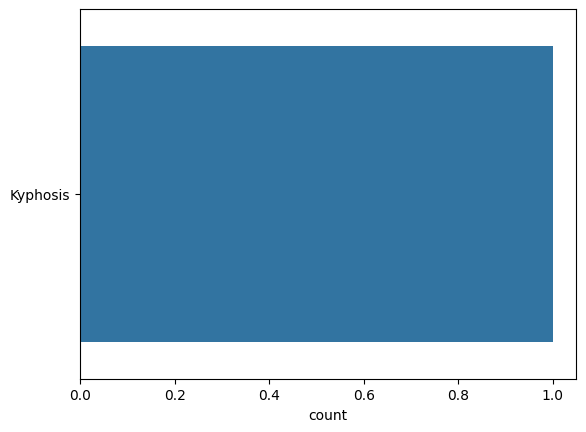

In [12]:
sns.countplot('Kyphosis')

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = df['Kyphosis']
x = df.drop('Kyphosis',axis=1)

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state= 101)

# Training the model

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [51]:
dtree1= DecisionTreeClassifier(criterion='entropy',max_depth=11,min_samples_split=8,min_samples_leaf=4)

In [52]:
dtree1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=4,
                       min_samples_split=8)

In [53]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

#Prediction

In [54]:
y_predict = dtree.predict(x_test)

In [55]:
y_predict1= dtree1.predict(x_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
confusion_matrix(y_test,y_predict)

array([[17,  0],
       [ 3,  5]])

In [58]:
confusion_matrix(y_test,y_predict1)

array([[16,  1],
       [ 7,  1]])

In [59]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

      absent       0.85      1.00      0.92        17
     present       1.00      0.62      0.77         8

    accuracy                           0.88        25
   macro avg       0.93      0.81      0.84        25
weighted avg       0.90      0.88      0.87        25



In [60]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

      absent       0.70      0.94      0.80        17
     present       0.50      0.12      0.20         8

    accuracy                           0.68        25
   macro avg       0.60      0.53      0.50        25
weighted avg       0.63      0.68      0.61        25



In [61]:

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

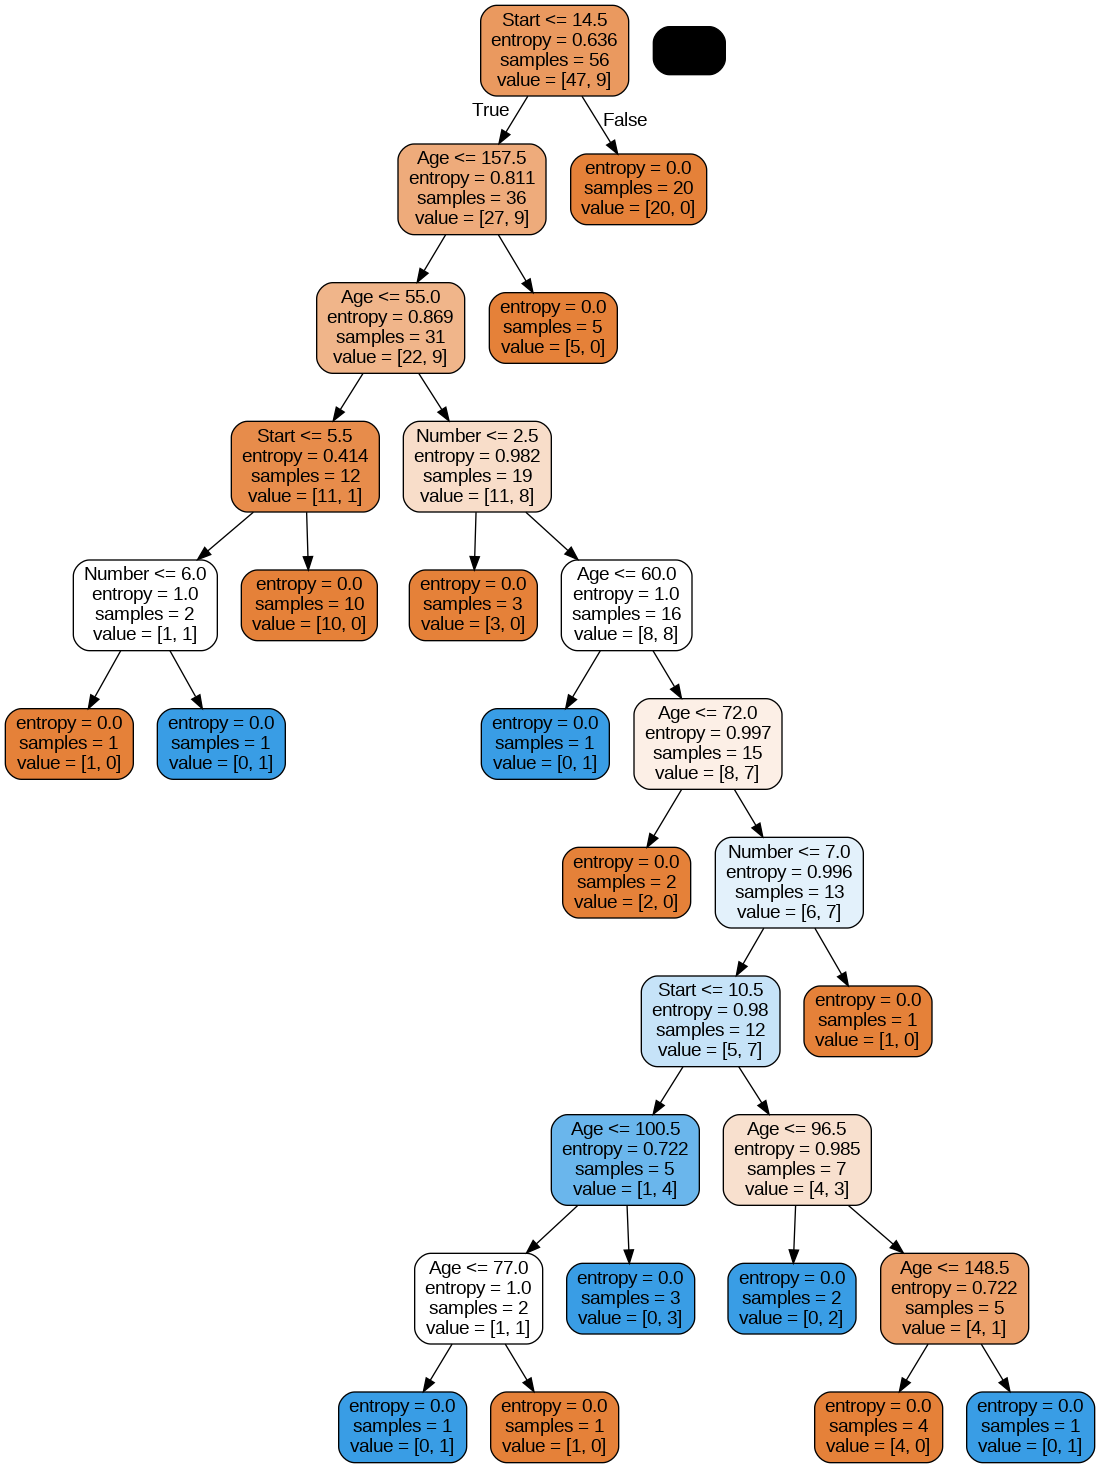

In [62]:
dot_data = StringIO()
export_graphviz(dtree,out_file= dot_data,feature_names= features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

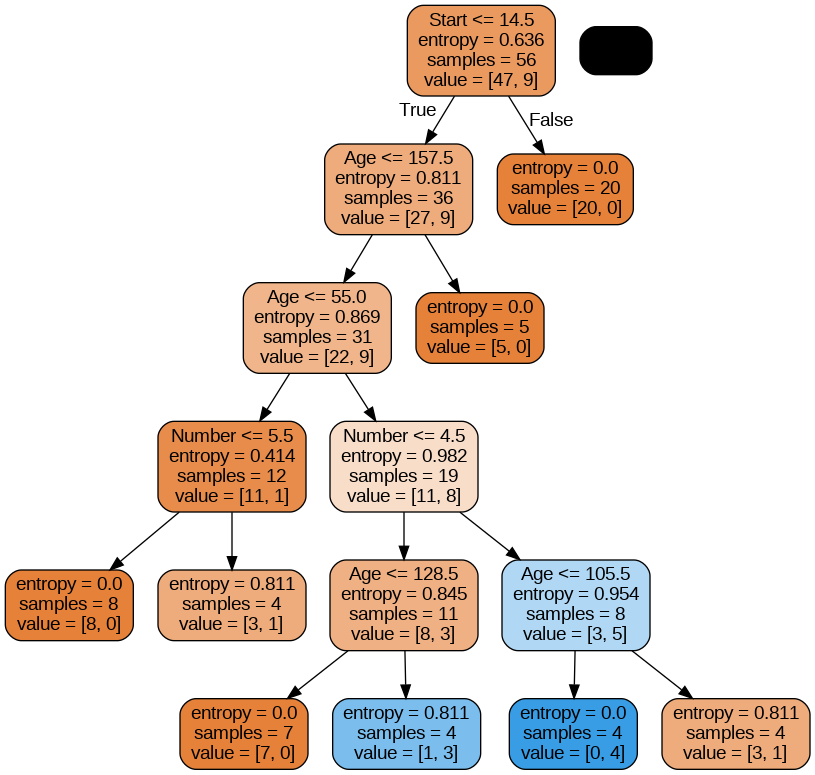

In [63]:
dot_data = StringIO()
export_graphviz(dtree1,out_file= dot_data,feature_names= features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())